In [81]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [82]:
#create dataframe by reading file
stock_market = pd.read_csv('data/synthetic_stock_data.csv')
stock_market.head()

,Date,Company,Sector,Open,High,Low,Close,Volume,Market_Cap,PE_Ratio,Dividend_Yield,Volatility,Sentiment_Score,Trend
0,2022-01-01,Uber,Technology,100.000000,101.036120,97.477809,100.000000,171958,5.156585e+11,24.253218,0.163090,0.047484,0.939232,Bearish
1,2022-01-02,Tesla,Automotive,100.071106,102.037960,97.152675,100.071106,196867,9.755658e+11,18.602848,0.288515,0.022472,0.469417,Bearish
2,2022-01-03,Panasonic,Finance,99.857828,101.517497,98.108097,99.857828,181932,4.595300e+11,10.728933,2.221827,0.019991,0.399193,Bullish
3,2022-01-04,Tencent,Automotive,98.851663,101.303783,96.998218,98.851663,153694,5.577481e+11,14.582696,1.377740,0.036166,0.705853,Stable
4,2022-01-05,Wells Fargo,Automotive,98.391118,99.990486,96.230707,98.391118,169879,8.607714e+11,37.491114,3.110198,0.034770,-0.768354,Stable


In [83]:
#Dataframe information
stock_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             1000 non-null   object 
 1   Company          1000 non-null   object 
 2   Sector           1000 non-null   object 
 3   Open             1000 non-null   float64
 4   High             1000 non-null   float64
 5   Low              1000 non-null   float64
 6   Close            1000 non-null   float64
 7   Volume           1000 non-null   int64  
 8   Market_Cap       1000 non-null   float64
 9   PE_Ratio         1000 non-null   float64
 10  Dividend_Yield   1000 non-null   float64
 11  Volatility       1000 non-null   float64
 12  Sentiment_Score  1000 non-null   float64
 13  Trend            1000 non-null   object 
dtypes: float64(9), int64(1), object(4)
memory usage: 109.5+ KB


In [84]:
stock_market.columns

Index(['Date', 'Company', 'Sector', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Market_Cap', 'PE_Ratio', 'Dividend_Yield', 'Volatility',
       'Sentiment_Score', 'Trend'],
      dtype='object')

In [85]:
stock_market['Company'].unique()

array(['Uber', 'Tesla', 'Panasonic', 'Tencent', 'Wells Fargo', 'Snapchat',
       'Adobe', 'Oracle', 'Novartis', 'Microsoft', 'Citigroup', 'HSBC',
       'Morgan Stanley', 'AstraZeneca', 'Moderna', 'Apple', 'Square',
       'Ferrari', 'PayPal', 'BP', 'Salesforce', 'Shell', 'Lamborghini',
       'Sony', 'Meta', 'Boeing', 'Lyft', 'IBM', 'Toyota', 'ExxonMobil',
       'Goldman Sachs', 'Intel', 'Chevron', 'Bank of America', 'LG',
       'AMD', 'Visa', 'Airbus', 'Mercedes-Benz', 'Nvidia', 'BMW',
       'SpaceX', 'Pfizer', 'Spotify', 'Netflix', 'TotalEnergies',
       'Samsung', 'Google', 'Roche', 'MasterCard', 'Ford',
       'Northrop Grumman', 'Amazon', 'General Motors', 'Alibaba',
       'Twitter', 'Lockheed Martin', 'Gilead Sciences', 'Porsche',
       'Johnson & Johnson', 'JPMorgan Chase', 'Raytheon', 'Honda'],
      dtype=object)

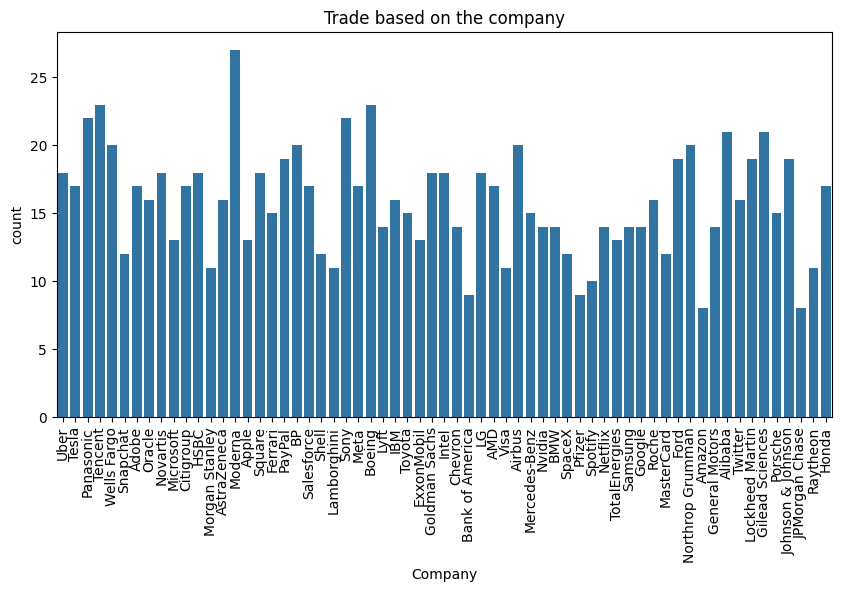

In [86]:
#plot trade based on the company
plt.figure(figsize=(10,5))
sns.countplot(x='Company',data=stock_market)
plt.title('Trade based on the company')
plt.xticks(rotation=90)
plt.show()

In [87]:
# 'Date' column is in datetime format
stock_market['Date'] = pd.to_datetime(stock_market['Date'])

In [88]:
# Now use .dt accessor
stock_market['dayofweek']=stock_market['Date'].dt.dayofweek
stock_market['day'] =stock_market['Date'].dt.day
stock_market['month']=stock_market['Date'].dt.month
stock_market['year']=stock_market['Date'].dt.year
stock_market['quarter']=stock_market['Date'].dt.quarter
stock_market['sin_day']=np.sin(stock_market['dayofweek'])
stock_market['cos_day']=np.cos(stock_market['dayofweek'])

stock_market.head(5)

,Date,Company,Sector,Open,High,Low,Close,Volume,Market_Cap,PE_Ratio,...,Volatility,Sentiment_Score,Trend,dayofweek,day,month,year,quarter,sin_day,cos_day
0,2022-01-01,Uber,Technology,100.000000,101.036120,97.477809,100.000000,171958,5.156585e+11,24.253218,...,0.047484,0.939232,Bearish,5,1,1,2022,1,-0.958924,0.283662
1,2022-01-02,Tesla,Automotive,100.071106,102.037960,97.152675,100.071106,196867,9.755658e+11,18.602848,...,0.022472,0.469417,Bearish,6,2,1,2022,1,-0.279415,0.960170
2,2022-01-03,Panasonic,Finance,99.857828,101.517497,98.108097,99.857828,181932,4.595300e+11,10.728933,...,0.019991,0.399193,Bullish,0,3,1,2022,1,0.000000,1.000000
3,2022-01-04,Tencent,Automotive,98.851663,101.303783,96.998218,98.851663,153694,5.577481e+11,14.582696,...,0.036166,0.705853,Stable,1,4,1,2022,1,0.841471,0.540302
4,2022-01-05,Wells Fargo,Automotive,98.391118,99.990486,96.230707,98.391118,169879,8.607714e+11,37.491114,...,0.034770,-0.768354,Stable,2,5,1,2022,1,0.909297,-0.416147


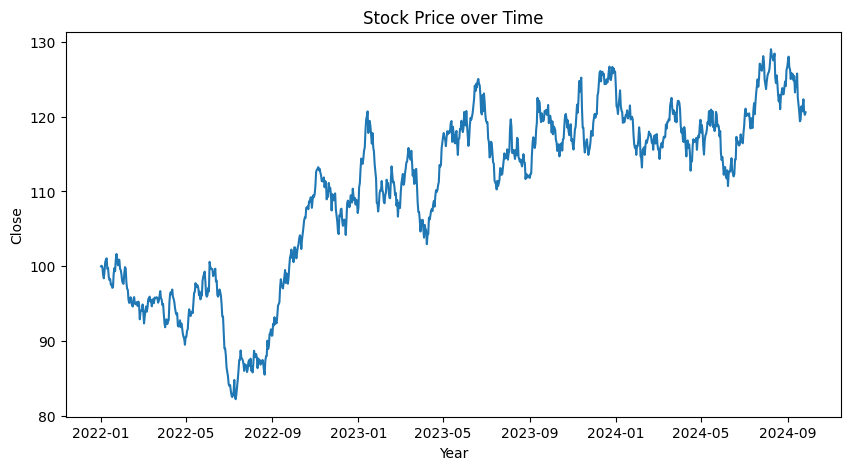

In [89]:
#plot graph on the closing
fig = plt.figure(figsize=(10,5))
plt.xlabel('Year')
plt.ylabel('Close')
plt.plot(stock_market['Date'], stock_market['Close'])
plt.title('Stock Price over Time')
plt.show()

In [90]:
#Drop Date column
stock_market = stock_market.drop(['Company','Sector'],axis=1)
stock_market.head()

,Date,Open,High,Low,Close,Volume,Market_Cap,PE_Ratio,Dividend_Yield,Volatility,Sentiment_Score,Trend,dayofweek,day,month,year,quarter,sin_day,cos_day
0,2022-01-01,100.000000,101.036120,97.477809,100.000000,171958,5.156585e+11,24.253218,0.163090,0.047484,0.939232,Bearish,5,1,1,2022,1,-0.958924,0.283662
1,2022-01-02,100.071106,102.037960,97.152675,100.071106,196867,9.755658e+11,18.602848,0.288515,0.022472,0.469417,Bearish,6,2,1,2022,1,-0.279415,0.960170
2,2022-01-03,99.857828,101.517497,98.108097,99.857828,181932,4.595300e+11,10.728933,2.221827,0.019991,0.399193,Bullish,0,3,1,2022,1,0.000000,1.000000
3,2022-01-04,98.851663,101.303783,96.998218,98.851663,153694,5.577481e+11,14.582696,1.377740,0.036166,0.705853,Stable,1,4,1,2022,1,0.841471,0.540302
4,2022-01-05,98.391118,99.990486,96.230707,98.391118,169879,8.607714e+11,37.491114,3.110198,0.034770,-0.768354,Stable,2,5,1,2022,1,0.909297,-0.416147


In [99]:
#stationary check
#Ho: TS is non-Stationary
#H1: TS is stationary
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=9).mean()
    rolstd = timeseries.rolling(window=9).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

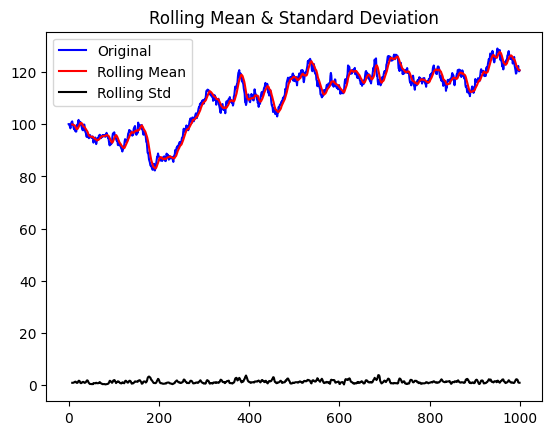

Results of Dickey-Fuller Test:
Test Statistic                  -1.503897
p-value                          0.531582
#Lags Used                       0.000000
Number of Observations Used    999.000000
Critical Value (1%)             -3.436913
Critical Value (5%)             -2.864437
Critical Value (10%)            -2.568313
dtype: float64


In [100]:
test_stationarity(stock_market['Close'])

p-value should be less than equal to 0.5 indicates time series is not stationary.

Test Statistic value should be always less than critical value indicates time series in not stationary

Need to go for tranformation.

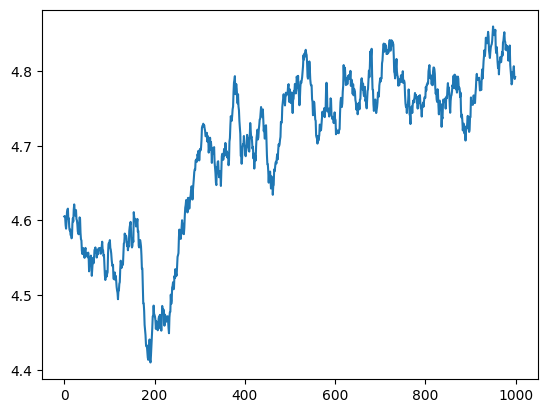

In [101]:
#Transformation
#Making TS Stationary
ts_log=np.log(stock_market['Close'])
ts_log.head()

stock_market['Close_log']=ts_log

plt.plot(ts_log)
plt.show()

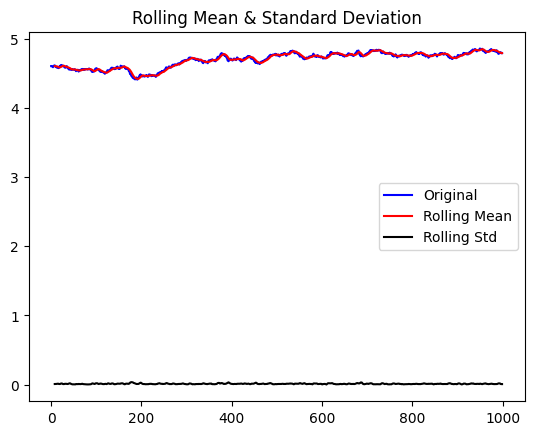

Results of Dickey-Fuller Test:
Test Statistic                  -1.425273
p-value                          0.570102
#Lags Used                       0.000000
Number of Observations Used    999.000000
Critical Value (1%)             -3.436913
Critical Value (5%)             -2.864437
Critical Value (10%)            -2.568313
dtype: float64


In [102]:
test_stationarity(ts_log)

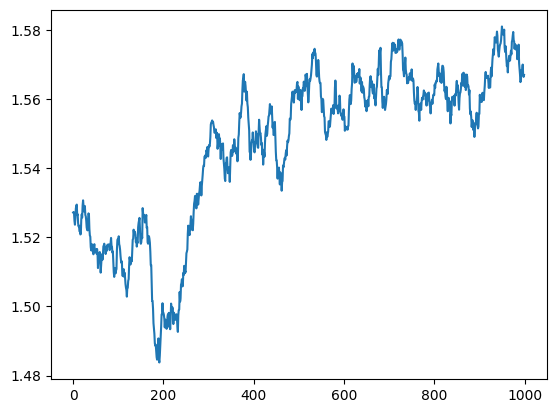

In [103]:
#check double log
ts_doublelog = np.log(ts_log)
ts_doublelog.head()

stock_market['Close_doublelog']=ts_doublelog

plt.plot(ts_doublelog)
plt.show()

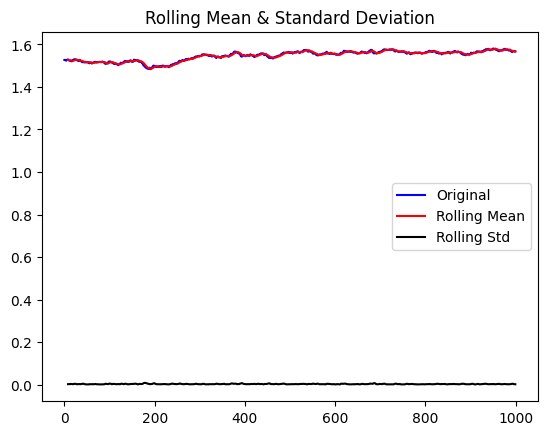

Results of Dickey-Fuller Test:
Test Statistic                  -1.411078
p-value                          0.576954
#Lags Used                       0.000000
Number of Observations Used    999.000000
Critical Value (1%)             -3.436913
Critical Value (5%)             -2.864437
Critical Value (10%)            -2.568313
dtype: float64


In [104]:
test_stationarity(ts_doublelog)

P-value is increasing and Test statistic is decreasing it indicates that the evidence against the null hypothesis is weakening

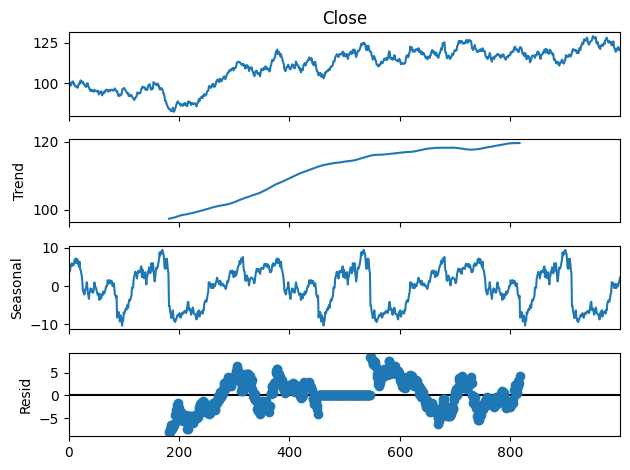

In [105]:
# Decompose the Close column
tsa_seasonal_close=stock_market['Close']
df_stock_d= stock_market[['year','Close']]

df_stock_d = df_stock_d.set_index('year')
df_stock_d.index = pd.PeriodIndex(df_stock_d.index, freq='A')

# Seasonal decomposition on the Close column
decomposition = seasonal_decompose(stock_market['Close'] ,model='additive', period=365)
decomposition.plot()
plt.show()

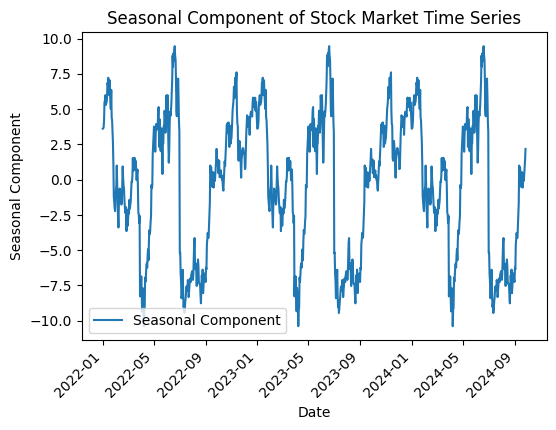

In [106]:
# Plot the seasonal component
plt.figure(figsize=(6, 4))
plt.plot(stock_market['Date'],decomposition.seasonal, label='Seasonal Component')
plt.title('Seasonal Component of Stock Market Time Series')
plt.xlabel('Date')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Seasonal Component')
plt.legend()
plt.show()

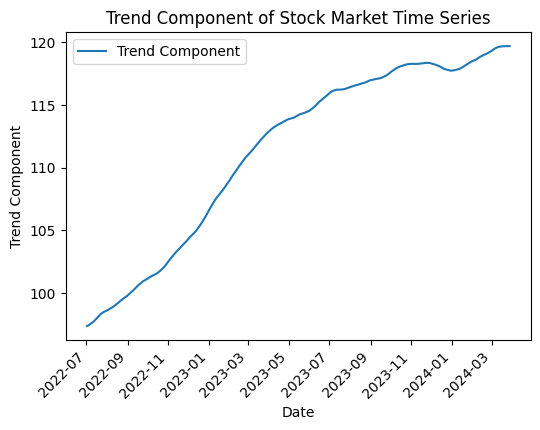

In [107]:
# Plot the Trend component
plt.figure(figsize=(6, 4))
plt.plot(stock_market['Date'],decomposition.trend, label='Trend Component')
plt.title('Trend Component of Stock Market Time Series')
plt.xlabel('Date')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Trend Component')
plt.legend()
plt.show()

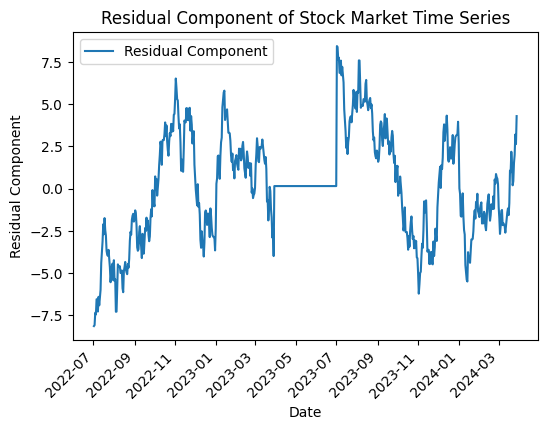

In [108]:
# Plot the Residual component
plt.figure(figsize=(6, 4))
plt.plot(stock_market['Date'],decomposition.resid, label='Residual Component')
plt.title('Residual Component of Stock Market Time Series')
plt.xlabel('Date')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Residual Component')
plt.legend()
plt.show()

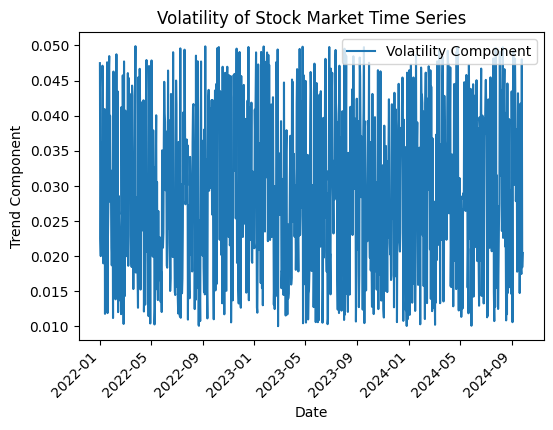

In [109]:
# Plot the Volatility component
plt.figure(figsize=(6, 4))
plt.plot(stock_market['Date'], stock_market['Volatility'],label='Volatility Component')
plt.title('Volatility of Stock Market Time Series')
plt.ylabel('Trend Component')
plt.xlabel('Date')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

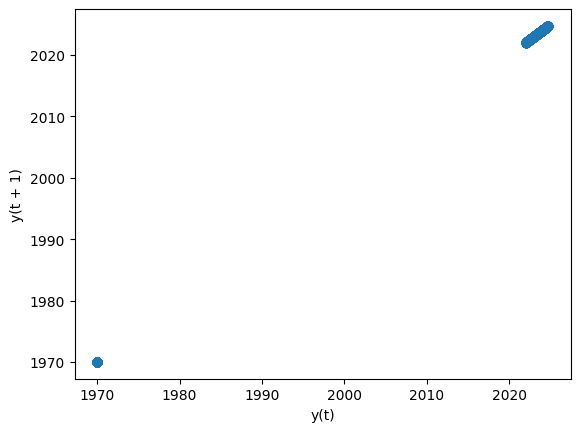

In [115]:
#Plot lag plot on the data
df_stock_lag= stock_market[['Date','Open', 'High', 'Low', 'Close', 'Volume']]
lag_plot(df_stock_lag)


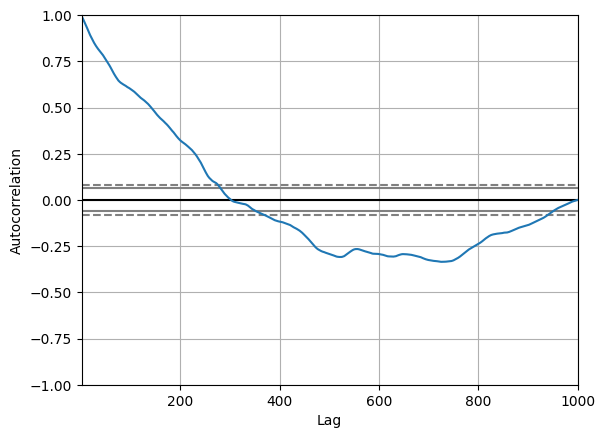

In [116]:
#Auto correlation of the close column
autocorrelation_plot(stock_market['Close'])
plt.show()

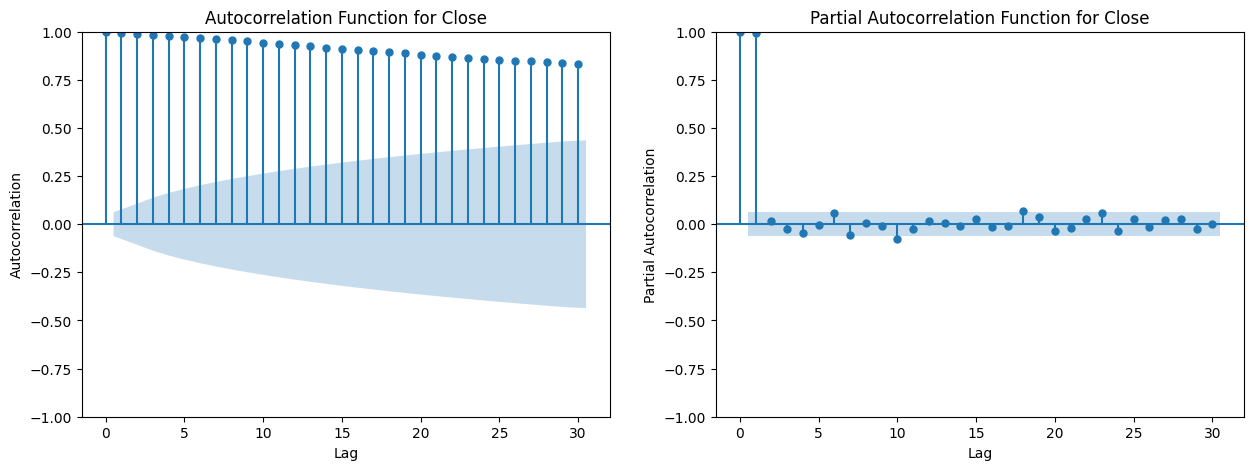

In [117]:
#Autocoreation and partial autocorrelation for close
fig, (ax, ax1) = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(stock_market['Close'], lags=30, ax=ax)
ax.set_title('Autocorrelation Function for Close')
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelation')
plot_pacf(stock_market['Close'], lags=30, ax=ax1)
ax1.set_title('Partial Autocorrelation Function for Close')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Partial Autocorrelation')
plt.show()

The series is likely non-stationary due to the slow decay of autocorrelations.There's no clear seasonality visible in this ACF plot.

There are no obvious cyclical or seasonal patterns visible in the PACF plot.

This PACF plot suggests that a simple model like ARIMA(1,d,q) might be suitable. Might also try ARIMA(1,d,1)

The rapid decay in partial autocorrelations after lag 1 is a good sign, but doesn't guarantee stationarity. You should still perform formal stationarity tests.

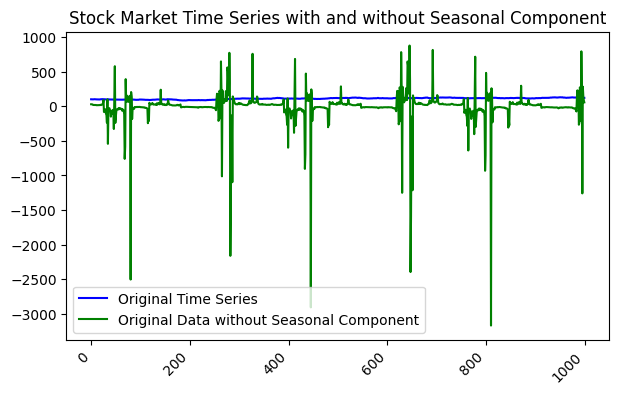

In [118]:
# Plotting the original data and original data without the seasonal component
plt.figure(figsize=(7, 4))

# Plot the original time series data
plt.plot(tsa_seasonal_close, label='Original Time Series', color='blue')
data_without_seasonal = tsa_seasonal_close / decomposition.seasonal

# Plot the original data without the seasonal component
plt.plot(data_without_seasonal,
         label='Original Data without Seasonal Component', color='green')
plt.title('Stock Market Time Series with and without Seasonal Component')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

In [21]:
#stock_market['year'].value_counts()

,count
year,
2022,365
2023,365
2024,270


In [119]:
#prepare train data
df_train =stock_market[stock_market['year']<2024]
X_train = df_train.drop(['Close'],axis=1)
y_train = df_train['Close']


In [120]:
#prepare test data
dt_test = stock_market[stock_market['year']>=2024]
X_test = dt_test.drop(['Close'],axis=1)
y_test = dt_test['Close']

In [121]:
print(f'Length of train data :{len(df_train)}' )
print(f'Length of test data :{len(dt_test)}' )

Length of train data :730
Length of test data :270


In [125]:
#AR Model
#training will be 73%, test will be 27% as per our model
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from numpy.linalg import LinAlgError

history = [x for x in y_train]
predictions = list()
y_test = y_test.reset_index(drop=True)
for t in range(len(y_test)):
    try:
        model = ARIMA(history, order=(4,1,2))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = y_test[t]
        history.append(obs)
    except (ValueError, LinAlgError):
        pass
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions)**0.5
print('Test MSE: %.3f' % rmse)

from math import sqrt
rms = sqrt(mean_squared_error(y_test, predictions))

predicted=126.303892, expected=124.020176
predicted=123.798397, expected=121.374001
predicted=121.068456, expected=121.164917
predicted=121.398473, expected=120.330935
predicted=120.126830, expected=121.608692
predicted=121.456917, expected=122.416050
predicted=122.785389, expected=123.500537
predicted=123.437444, expected=121.453786
predicted=121.271635, expected=120.796556
predicted=121.020471, expected=120.596688
predicted=120.468589, expected=119.166670
predicted=118.868001, expected=119.777474
predicted=120.064031, expected=119.228101
predicted=119.180861, expected=119.639756
predicted=119.353036, expected=120.200474
predicted=120.275739, expected=120.141553
predicted=120.035645, expected=120.827753
predicted=120.570525, expected=119.750565
predicted=119.751174, expected=120.000903
predicted=119.868456, expected=120.096747
predicted=119.824860, expected=121.486194
predicted=121.442798, expected=119.604587
predicted=119.681056, expected=119.900028
predicted=119.645375, expected=119

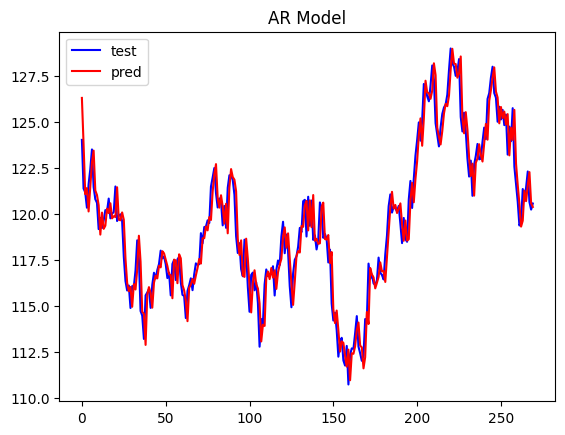

In [129]:
#plot test and predict
plt.plot(y_test, color = 'blue', label='test')
plt.plot(predictions, color='red', label='pred')
plt.title('AR Model')
plt.legend()
plt.show()

In [130]:
#Mean square error
from sklearn.metrics import mean_squared_error
rmse= mean_squared_error(y_test, predictions)
print('RMSE: %.3f' % rmse)

RMSE: 1.309
